In [575]:
import numpy as np
import pandas as pd


In [576]:
df_data = pd.read_csv("kidney_disease.csv")

In [577]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [578]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [579]:
df_data.drop('id', axis=1, inplace=True)


In [580]:
df_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [581]:
df_data.describe()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [582]:
df_data.columns = [
    'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
    'potassium', 'haemoglobin', 'packed_cell_volume',
    'white_blood_cell_count', 'red_blood_cell_count',
    'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
    'appetite', 'peda_edema', 'anemia', 'class'
]


In [583]:
df_data.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [584]:
text_columns = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
for i in text_columns:
    print(f"{i} : {df_data[i].dtype}")



packed_cell_volume : object
white_blood_cell_count : object
red_blood_cell_count : object


In [585]:
def convert_text_to_numeric( df_data,column):
    df_data[column] = pd.to_numeric(df_data[column], errors='coerce')

for column in text_columns:
    convert_text_to_numeric(df_data,column)
    print(f"{column} : {df_data[column].dtype}")



packed_cell_volume : float64
white_blood_cell_count : float64
red_blood_cell_count : float64


In [586]:
missing = df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(20)


red_blood_cells           152
red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
pus_cell                   65
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
pus_cell_clumps             4
bacteria                    4
hypertension                2
diabetes_mellitus           2
dtype: int64

In [587]:
def mean_value_imputation(df_data, column):
    mean_value =df_data[column].mean()
    df_data.loc[:,column] = df_data[column].fillna(mean_value)


def mode_value_imputation(df_data, column):
    mode = df_data[column].mode()[0]
    df_data[column] = df_data[column].fillna(mode)




In [588]:
df_data.columns


Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

In [589]:
num_cols = [col for col in df_data.columns if df_data[col].dtype!='object']
for col_name in num_cols:
    mean_value_imputation(df_data, col_name)


In [590]:
cat_cols = [col for col in df_data.columns if df_data[col].dtype =='object']
for col_name in cat_cols:
    mode_value_imputation(df_data, col_name)

In [591]:
missing = df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(20)

Series([], dtype: int64)

In [592]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [593]:
print(f"diabetes_mellitus :- { df_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease :- {df_data['coronary_artery_disease'].unique()}")
print(f"class :- {df_data['class'].unique()}")



diabetes_mellitus :- ['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease :- ['no' 'yes' '\tno']
class :- ['ckd' 'ckd\t' 'notckd']


In [594]:
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].replace(to_replace= {' yes':'yes','\tno':'no','\tyes':'yes'})
df_data['coronary_artery_disease']= df_data['coronary_artery_disease'].replace(to_replace ={'\tno' : 'no'})
df_data['class'] = df_data['class'].replace(to_replace= {'ckd\t':'ckd','notckd' : 'not ckd'})



In [595]:
print(f"diabetes_mellitus :- { df_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease :- {df_data['coronary_artery_disease'].unique()}")
print(f"class :- {df_data['class'].unique()}")


diabetes_mellitus :- ['yes' 'no']
coronary_artery_disease :- ['no' 'yes']
class :- ['ckd' 'not ckd']


In [596]:
# class : ['ckd' 'not ckd']

df_data['class'] = df_data['class'].map({'ckd': 1, 'not ckd': 0})

df_data['red_blood_cells'] = df_data['red_blood_cells'].map({'normal': 1, 'abnormal': 0})
df_data['pus_cell'] = df_data['pus_cell'].map({'normal': 1, 'abnormal': 0})
df_data['pus_cell_clumps'] = df_data['pus_cell_clumps'].map({'present': 1, 'notpresent': 0})
df_data['bacteria'] = df_data['bacteria'].map({'present': 1, 'notpresent': 0})
df_data['hypertension'] = df_data['hypertension'].map({'yes': 1, 'no': 0})
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].map({'yes': 1, 'no': 0})
df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].map({'yes': 1, 'no': 0})
df_data['appetite'] = df_data['appetite'].map({'good': 1, 'poor': 0})
df_data['peda_edema'] = df_data['peda_edema'].map({'yes': 1, 'no': 0})
df_data['anemia'] = df_data['anemia'].map({'yes': 1, 'no': 0})


In [597]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [598]:
import matplotlib.pyplot as plt
import seaborn as sns

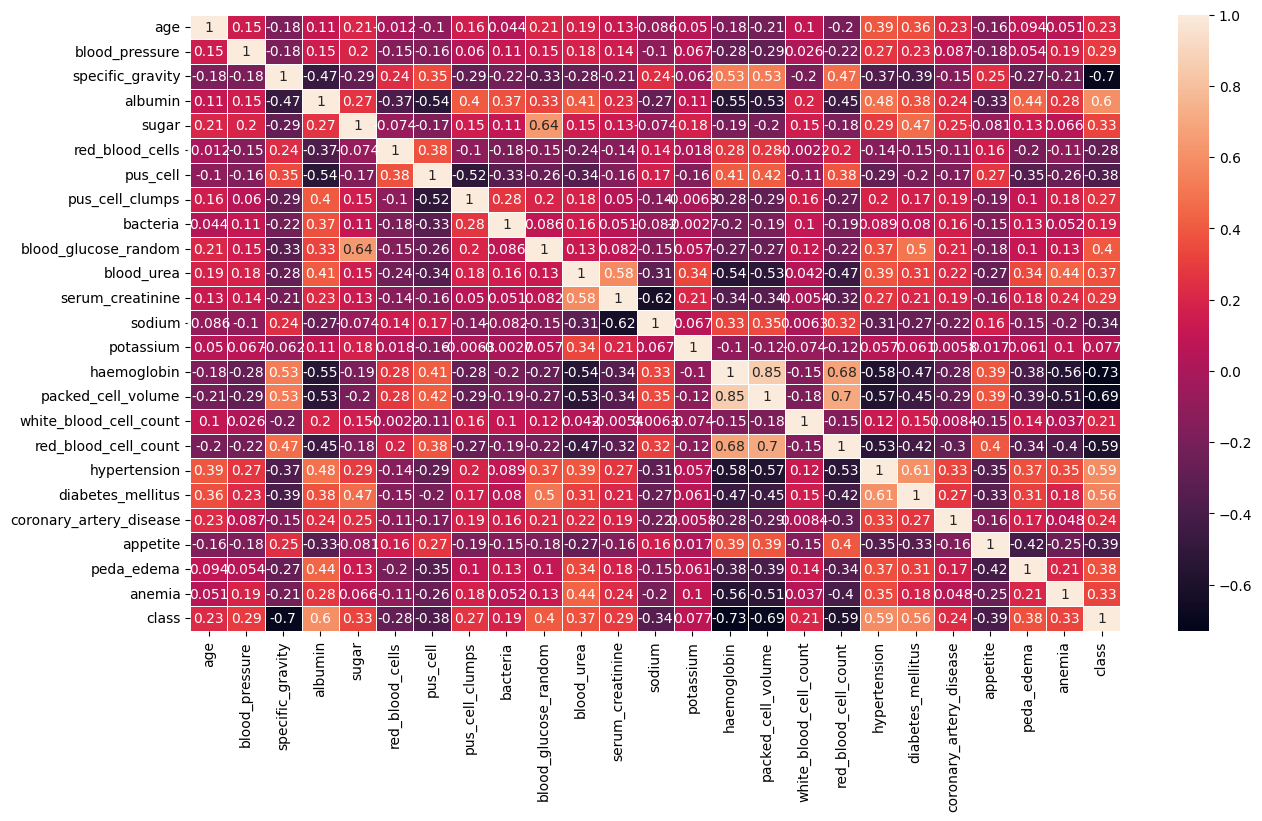

In [599]:
plt.figure(figsize=(15,8))
sns.heatmap(df_data.corr(), annot=True, linewidths=0.5)
plt.show()

In [600]:
target_corr = df_data.corr()['class'].abs().sort_values(ascending = False)[1:]
target_corr


haemoglobin                0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cell                   0.375154
peda_edema                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anemia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [601]:
df_data['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

In [602]:
from sklearn.model_selection import train_test_split

In [603]:
x = df_data.drop("class",axis=1)
Y = df_data["class"]

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25 ,random_state= 25)

print(f"'x' shape :- {x_train.shape}")
print(f"'y' shape :- {y_test.shape}")

'x' shape :- (300, 24)
'y' shape :- (100,)


In [604]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct._fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [605]:
y_pred_dct = dct.predict(x_test)
y_pred_dct

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [606]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [607]:
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=8)))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('SVM', SVC(kernel='linear')))

In [608]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [609]:


for name, model in models:
    print(name, model)
    print()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print('\n')
    print("precision: ", precision_score(y_test, y_pred))
    print('\n')
    print("recall: ", recall_score(y_test, y_pred))
    print('\n')
    print("f1score: ", f1_score(y_test, y_pred))
    print('\n')

Naive Bayes GaussianNB()

[[37  0]
 [ 5 58]]


accuracy:  0.95


precision:  1.0


recall:  0.9206349206349206


f1score:  0.9586776859504132


KNN KNeighborsClassifier(n_neighbors=8)

[[31  6]
 [18 45]]


accuracy:  0.76


precision:  0.8823529411764706


recall:  0.7142857142857143


f1score:  0.7894736842105263


RandomForestClassifier RandomForestClassifier()

[[35  2]
 [ 0 63]]


accuracy:  0.98


precision:  0.9692307692307692


recall:  1.0


f1score:  0.984375


DecisionTreeClassifier DecisionTreeClassifier()

[[35  2]
 [ 2 61]]


accuracy:  0.96


precision:  0.9682539682539683


recall:  0.9682539682539683


f1score:  0.9682539682539683


SVM SVC(kernel='linear')

[[34  3]
 [ 2 61]]


accuracy:  0.95


precision:  0.953125


recall:  0.9682539682539683


f1score:  0.9606299212598425


